#  Recommendation System for Netflix Prize Dataset using SVD

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [2]:
d = pd.read_csv('combined_data_1.txt')
d.head()


,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [3]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns 

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column
dataset.head()


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203817 entries, 0 to 203816
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cust_Id  203817 non-null  object 
 1   Rating   203786 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [5]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
#To inspect the shape of the datset
dataset.shape

(203817, 2)

In [7]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows 

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,8151
2.0,17610
3.0,56223
4.0,77339
5.0,44463


In [9]:
dataset.head()
#how will i differentiate b/w movie id and user id???


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [10]:
dataset.isnull().sum()[1]

31

In [11]:
dataset['Rating'].isnull().sum()


31

In [12]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

31

In [13]:
dataset.shape

(203817, 2)

In [14]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
# - movie_count because 
#we dont want 1,2,3,4.... movie cpunt
#to be added
cust_count

153322

In [15]:
dataset['Cust_Id'].nunique()

153353

In [16]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

203786

In [17]:
dataset['Cust_Id'].count()

203817

## To plot the distribution of the ratings in as a bar plot

In [18]:
a=10
b=20
print('my 1st number is',a,'and second number is',b)
print(f'my 1st number is {a} and second number is {b}')

my 1st number is 10 and second number is 20
my 1st number is 10 and second number is 20


In [19]:
p

,count
Rating,
1.0,8151
2.0,17610
3.0,56223
4.0,77339
5.0,44463


Text(0.5, 1.0, 'Total pool: 31 Movies, 153322 customers, 203786 ratings given')

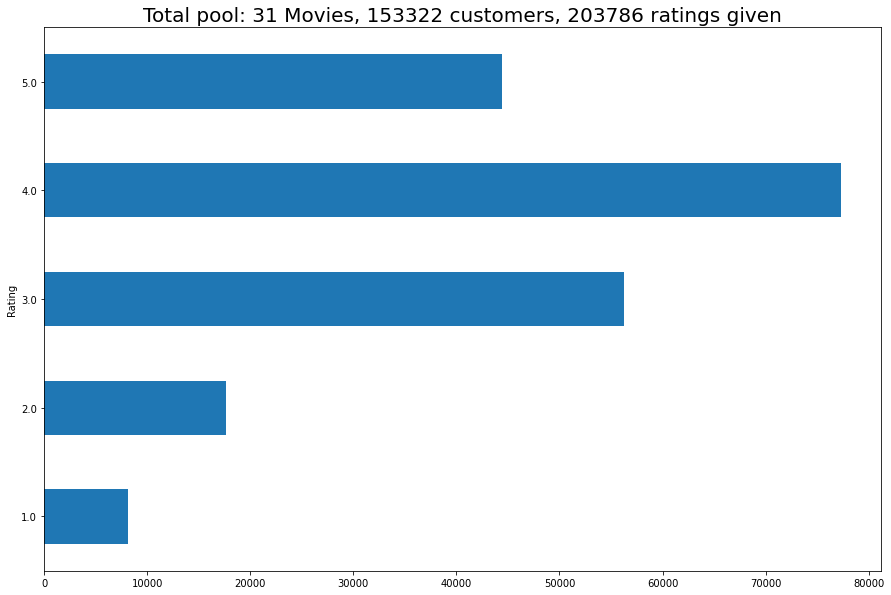

In [20]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


#print--->print data  '' 'Total pool'  

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [21]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [22]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset['Rating']))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [23]:
pd.isnull(dataset['Rating'])

0          True
1         False
2         False
3         False
4         False
          ...  
203812    False
203813    False
203814    False
203815    False
203816     True
Name: Rating, Length: 203817, dtype: bool

In [24]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
3991,True
5011,True
5105,True
20016,True
20112,True


In [25]:
df_nan.shape

(31, 1)

In [26]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [27]:
df_nan['index'][1:]

1        548
2        694
3       2707
4       2850
5       3991
6       5011
7       5105
8      20016
9      20112
10     20362
11     20561
12     21108
13     21234
14     21353
15     21644
16     24344
17     31453
18     42176
19     42716
20     42833
21     43052
22     43256
23     43872
24     45206
25     46414
26     52276
27     52550
28     92303
29     92827
30    203816
Name: index, dtype: int64

In [28]:
df_nan['index'][:-1]

0         0
1       548
2       694
3      2707
4      2850
5      3991
6      5011
7      5105
8     20016
9     20112
10    20362
11    20561
12    21108
13    21234
14    21353
15    21644
16    24344
17    31453
18    42176
19    42716
20    42833
21    43052
22    43256
23    43872
24    45206
25    46414
26    52276
27    52550
28    92303
29    92827
Name: index, dtype: int64

In [29]:
df_nan['index'][:-1]

0         0
1       548
2       694
3      2707
4      2850
5      3991
6      5011
7      5105
8     20016
9     20112
10    20362
11    20561
12    21108
13    21234
14    21353
15    21644
16    24344
17    31453
18    42176
19    42716
20    42833
21    43052
22    43256
23    43872
24    45206
25    46414
26    52276
27    52550
28    92303
29    92827
Name: index, dtype: int64

In [30]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [31]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [ 1.  1.  1. ... 30. 30. 30.]
Length: 203786


In [32]:
np.full([1,20],5)

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

In [33]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [34]:
#temp = np.full((1,547), 1)

In [35]:
#print(temp)

In [36]:
#tuple(x)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203786 entries, 1 to 203815
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cust_Id   203786 non-null  int64  
 1   Rating    203786 non-null  float64
 2   Movie_Id  203786 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 6.2 MB


In [43]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head(100)

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
96,1834590,3.0,1
97,593225,3.0,1
98,1011918,4.0,1
99,1665054,4.0,1


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203786 entries, 1 to 203815
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cust_Id   203786 non-null  int64  
 1   Rating    203786 non-null  float64
 2   Movie_Id  203786 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 6.2 MB


In [45]:
dataset.shape

(203786, 3)

# Data Cleaning

In [46]:
f = ['count','mean']
#count and mean 

In [48]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary.index = dataset_movie_summary.index.map(int)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
6,1019,3.084396
7,93,2.129032
8,14910,3.189805
9,95,2.621053


In [49]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1245.0


In [50]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary.index = dataset_movie_summary.index.map(int)
dataset_movie_summary.head()

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298


In [51]:
dataset_movie_summary.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64', name='Movie_Id')

In [52]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 1.0


In [53]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (203786, 3)


In [54]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (195385, 3)


In [55]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [56]:
dataset.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [57]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(150252, 9)


In [59]:
df_p.tail()

Movie_Id,3,8,16,17,18,24,26,28,30
Cust_Id,,,,,,,,,
2649376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2649378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2649426,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0
2649429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


### To load the movie_titles dataset

In [61]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head())

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [62]:
#conda install -c conda-forge scikit-surprise

In [63]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633998 sha256=1e5059d5addae4e0c676835b711dadb433093928d0705dc5f7fd98b07ec1e982
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [64]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [68]:
# Load Reader library
reader = Reader()
#To load a dataset from a pandas dataframe, you will need the load_from_df() method
# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0405  1.0384  1.0322  1.0370  0.0035  
MAE (testset)     0.8330  0.8274  0.8214  0.8273  0.0047  
Fit time          4.87    4.69    4.76    4.77    0.07    
Test time         0.39    0.22    0.25    0.29    0.07    


{'test_rmse': array([1.04048817, 1.03843586, 1.03217695]),
 'test_mae': array([0.83295026, 0.82737694, 0.82143931]),
 'fit_time': (4.868022203445435, 4.685779809951782, 4.762857437133789),
 'test_time': (0.39017510414123535, 0.22314953804016113, 0.24669337272644043)}

In [69]:
dataset.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [70]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3    Character
Name: Name, dtype: object

# Train an SVD to predict movies for user with userId = 712664

In [71]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [72]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

         Year                                           Name  Estimate_Score
2      1997.0                                      Character        4.534690
27     2002.0                                Lilo and Stitch        4.187048
29     2003.0                         Something's Gotta Give        4.050335
17     1994.0                               Immortal Beloved        4.030789
11853  1939.0                         Only Angels Have Wings        3.786272
11859  1976.0  Bruce Lee: Fists of Fury / Chinese Connection        3.786272
11858  1996.0                       Star Trek: First Contact        3.786272
11857  1974.0                           Good Times: Season 2        3.786272
11856  2000.0                         The Man Show: Season 2        3.786272
11855  1962.0                                    Half Ticket        3.786272
